In [45]:
# ============================================
# Step 1 — Import libraries
# ============================================
import pandas as pd
import numpy as np


In [30]:

# ============================================
# Step 2 — Create or load data
# ============================================
import pandas as pd

# Replace the path below with the exact file path on your computer
file_path = "/Users/Nil/Downloads/BENEFITS/WP2/WP2.2/GLEI_micro_simulation_data.xlsx"

# Read the first sheet (default)
data = pd.read_excel(file_path)

# Display the first few rows to verify
print("Data preview:")
print(data.head(20))

Data preview:
      DEMO_LSOA         DEMO_ETHNC                DEMO_EMPLS  \
0   Camden 021C              Black                     Other   
1   Camden 021C              White                Unemployed   
2   Camden 021C              White                 Full-time   
3   Camden 021C              Mixed                 Full-time   
4   Camden 021C              Mixed                 Full-time   
5   Camden 021C              Black                 Full-time   
6   Camden 021D  Prefer not to say                   Student   
7   Camden 021D              White                 Full-time   
8   Camden 021C              Black                Unemployed   
9   Camden 021C              White                 Full-time   
10  Camden 021C              White                 Full-time   
11  Camden 021C              White                 Full-time   
12  Camden 022D              Asian                   Student   
13  Camden 022D              Black  Housewife/husband/person   
14  Camden 022D           

In [12]:
#see the unique columns in each row
import pandas as pd

# If not already loaded:
# file_path = "/Users/Nil/Downloads/BENEFITS/WP2/WP2.2/CPI_micro_simulation_data.xlsx"
# data = pd.read_excel(file_path)

print("🔍 Unique attribute counts per column:\n")

for col in data.columns:
    unique_count = data[col].nunique(dropna=True)
    print(f"{col}: {unique_count} unique values")

# Optional: see the actual unique values for short columns
print("\n⚙️ Preview of unique values (for selected columns):\n")
for col in data.columns[:10]:   # change 10 to any number of columns you want to inspect
    print(f"\n{col}:")
    print(data[col].dropna().unique()[:20])  # limit to first 20 unique items

🔍 Unique attribute counts per column:

DEMO_LSOA: 12 unique values
DEMO_ETHNC: 6 unique values
DEMO_EMPLS: 9 unique values
L_EOYP_QUAL: 10 unique values
Education: 6 unique values
Age: 79 unique values
Age_Group: 4 unique values
DEMO_SEX: 4 unique values
DEMO_ETHNC.1: 18 unique values
SE_IE_INCOME: 17 unique values
Income: 7 unique values
DEMO_DISA: 4 unique values

⚙️ Preview of unique values (for selected columns):


DEMO_LSOA:
['Camden 021C' 'Camden 021D' 'Camden 022D' 'Camden 022E' 'Camden 021B'
 'Camden 022G' 'Camden 023A' 'Camden 023E' 'Camden 023C' 'Camden 022A'
 'Camden 022C' 'Camden 023F']

DEMO_ETHNC:
['Black' 'White' 'Mixed' 'Prefer not to say' 'Asian' 'Other']

DEMO_EMPLS:
['Other' 'Unemployed' 'Full-time' 'Student' 'Housewife/husband/person'
 'Retired' 'Part-time' 'Unable to work due to long term illness'
 'Prefer not to say']

L_EOYP_QUAL:
['No formal education'
 'Bachelors or equivalent first-degree qualification'
 'Postgraduate Certificate or Diploma'
 'Masters or equiv

In [37]:

# ==========================================================
# STEP 1 — Keep only the relevant columns
# ==========================================================
cols_needed = ["DEMO_ETHNC", "Age", "DEMO_EMPLS", "DEMO_SEX", "DEMO_DISA"]
df = data[cols_needed].copy()

# ==========================================================
# STEP 2 — Clean ETHNICITY
# ==========================================================
eth_map = {
    "White": "White",
    "Black": "Black",
    "Asian": "Asian",
    "Mixed": "Mixed",
    "Other": "Other",
    "Prefer not to say": "Other"
}
df["DEMO_ETHNC"] = df["DEMO_ETHNC"].map(eth_map)

# ==========================================================
# STEP 3 — Clean EMPLOYMENT
# ==========================================================
empl_map = {
    "Full-time": "Full-time",
    "Part-time": "Part-time",
    "Unemployed": "Unemployed",
    "Student": "Student",
    "Retired": "Retired",
    "Housewife/husband/person": "House person",
    "Unable to work due to long term illness": "Longterm illness",
    "Prefer not to say": "others",
    "Other": "others"
}
df["DEMO_EMPLS"] = df["DEMO_EMPLS"].map(empl_map)

# ==========================================================
# STEP 4 — Create EMPLOYMENT ACTIVITY STATUS (Active vs Inactive)
# ==========================================================
empl_active_map = {
    "Full-time": "Active",
    "Part-time": "Active",
    "Unemployed": "Inactive",
    "Student": "Inactive",
    "House person": "Inactive",
    "Longterm illness": "Inactive",
    "Retired": "Others",
    "others": "Others"
}
df["DEMO_EMPLS_ACTIVE"] = df["DEMO_EMPLS"].map(empl_active_map)

# ==========================================================
# STEP 5 — Clean SEX
# ==========================================================
sex_map = {
    "Male": "Male",
    "Female": "Female",
    "Non-binary / third gender": "LGBTQ",
    "Prefer not to say": "Other"
}
df["DEMO_SEX"] = df["DEMO_SEX"].map(sex_map)

# ==========================================================
# STEP 6 — Clean DISABILITY
# ==========================================================
df["DEMO_DISA"] = df["DEMO_DISA"].replace({
    "Yes, limited a little": "Yes",
    "Yes, limited a lot": "Yes",
    "No": "No",
    "Prefer not to say": "Unknown",
    "Don't know": "Unknown",
    np.nan: "Unknown"
})

# ==========================================================
# STEP 7 — Create AGE GROUPS (Target Policy Groups)
# ==========================================================
def age_to_group(age):
    if pd.isna(age):
        return "Unknown"
    try:
        age = int(age)
    except:
        return "Unknown"
    if age <= 18:
        return "Children and adolescents (0–18)"
    elif 18 < age <= 25:
        return "Young adults (18–25)"
    elif 25 < age <= 64:
        return "Adults (26–64)"
    elif age > 64:
        return "Older adults (65+)"
    else:
        return "Unknown"

df["Age_Group"] = df["Age"].apply(age_to_group)

# ==========================================================
# STEP 8 — Preview results
# ==========================================================
print("\n✅ Cleaned and structured dataset preview:")
print(df.head())

print("\nUnique values in each key column:")
for c in ["DEMO_ETHNC", "DEMO_EMPLS", "DEMO_EMPLS_ACTIVE", "DEMO_SEX", "DEMO_DISA", "Age_Group"]:
    print(f"{c}: {df[c].unique()}")

# ==========================================================
# STEP 9 — Save cleaned dataset (optional)
# ==========================================================
df.to_excel("cleaned_micro_sim_data_final.xlsx", index=False)
print("\n💾 Cleaned dataset saved as 'cleaned_micro_sim_data_final.xlsx'")


✅ Cleaned and structured dataset preview:
  DEMO_ETHNC  Age  DEMO_EMPLS DEMO_SEX DEMO_DISA DEMO_EMPLS_ACTIVE  \
0      Black   43      others     Male        No            Others   
1      White   28  Unemployed     Male       Yes          Inactive   
2      White   27   Full-time     Male        No            Active   
3      Mixed   31   Full-time     Male        No            Active   
4      Mixed   26   Full-time   Female        No            Active   

        Age_Group  
0  Adults (26–64)  
1  Adults (26–64)  
2  Adults (26–64)  
3  Adults (26–64)  
4  Adults (26–64)  

Unique values in each key column:
DEMO_ETHNC: ['Black' 'White' 'Mixed' 'Other' 'Asian']
DEMO_EMPLS: ['others' 'Unemployed' 'Full-time' 'Student' 'House person' 'Retired'
 'Part-time' 'Longterm illness']
DEMO_EMPLS_ACTIVE: ['Others' 'Inactive' 'Active']
DEMO_SEX: ['Male' 'Female' 'LGBTQ' 'Other']
DEMO_DISA: ['No' 'Yes' 'Unknown']
Age_Group: ['Adults (26–64)' 'Young adults (18–25)' 'Older adults (65+)'
 'Children 

In [39]:
# ============================================
# Step 3 — Define transition rules
# ============================================
import numpy as np

# --- Rule helper: keep probabilities valid
def _renorm(d):
    s = sum(d.values())
    if s <= 0:
        n = len(d)
        return {k: 1.0/n for k in d}
    return {k: v/s for k, v in d.items()}

# --- Rule: Employment transition (influenced by current state + age + disability + sex + ethnicity)
# Uses ONLY your current columns:
#   DEMO_EMPLS, Age_Group, DEMO_DISA, DEMO_SEX, DEMO_ETHNC
# Creates: a recommended NEXT employment state
def transition_employment(row):
    # Allowed states (must match your cleaned categories)
    states = [
        "Full-time","Part-time","Unemployed","Student",
        "House person","Longterm illness","Retired","others"
    ]

    # 1) baseline persistence: prefer staying where you are
    stay_prob = 0.70
    remaining = (1.0 - stay_prob)
    # simple spread for the rest
    base = {s: remaining/(len(states)-1) for s in states}
    cur = row["DEMO_EMPLS"]
    if cur not in states:
        cur = "others"
    base[cur] = stay_prob

    # 2) age effects (policy groups already in your df)
    ag = row.get("Age_Group", "Adults (26–64)")
    if ag == "Young adults (18–25)":
        # more chance of Student or Part-time, less Retired/House person
        base["Student"]          *= 1.30
        base["Part-time"]        *= 1.15
        base["Retired"]          *= 0.60
        base["House person"]     *= 0.85
    elif ag == "Adults (26–64)":
        # productive peak: tilt to Full-time
        base["Full-time"]        *= 1.20
        base["Unemployed"]       *= 0.90
    elif ag == "Older adults (65+)":
        base["Retired"]          *= 1.60
        base["Full-time"]        *= 0.60
        base["Part-time"]        *= 0.80

    # 3) disability effects
    disa = row.get("DEMO_DISA", "Unknown")
    if disa == "Yes, limited a lot":
        base["Longterm illness"] *= 1.80
        base["Full-time"]        *= 0.50
        base["Part-time"]        *= 0.80
    elif disa == "Yes, limited a little":
        base["Longterm illness"] *= 1.30
        base["Full-time"]        *= 0.85
    # "No" or "Unknown": no change

    # 4) sex effects (very light touch; you can tune)
    sex = row.get("DEMO_SEX", "Other")
    if sex == "Female":
        base["Part-time"]        *= 1.15
        base["House person"]     *= 1.15
    elif sex == "Male":
        base["Full-time"]        *= 1.05

    # 5) ethnicity effects (light, neutral-leaning; tune if needed)
    eth = row.get("DEMO_ETHNC", "Other")
    if eth in {"Black","Asian","Mixed","Other"}:
        # slightly higher risk of part-time/unemployment vs full-time
        base["Full-time"]        *= 0.95
        base["Part-time"]        *= 1.05
        base["Unemployed"]       *= 1.05

    # 6) normalize and draw
    probs = _renorm(base)
    nxt = np.random.choice(list(probs.keys()), p=list(probs.values()))
    return nxt

# --- (Optional) Rule: Age increments by 1 per period (set to False if you don’t want aging)
AGE_INCREMENTS = False
def transition_age(current_age):
    if AGE_INCREMENTS and pd.notna(current_age):
        try:
            return int(current_age) + 1
        except:
            return current_age
    return current_age

# --- (Utility) Recompute Age_Group from numeric Age ONLY IF age changes
def age_to_group(age):
    if pd.isna(age):
        return "Unknown"
    try:
        a = int(age)
    except:
        return "Unknown"
    if a <= 18:
        return "Children and adolescents (0–18)"
    elif 18 < a <= 25:
        return "Young adults (18–25)"
    elif 25 < a <= 64:
        return "Adults (26–64)"
    else:
        return "Older adults (65+)"

In [40]:
# ============================================
# Step 4 — Run the simulation loop
# ============================================
np.random.seed(42)     # optional: reproducible draws
years = 1              # set >1 if you want multiple periods
history = []

sim = df.copy()        # df = your cleaned dataset

for t in range(1, years + 1):
    sim["NEXT_Age"] = sim["Age"].apply(transition_age)
    sim["NEXT_Age_Group"] = sim["Age_Group"] if not AGE_INCREMENTS else sim["NEXT_Age"].apply(age_to_group)

    sim["NEXT_DEMO_EMPLS"] = sim.apply(transition_employment, axis=1)
    sim["NEXT_DEMO_EMPLS_ACTIVE"] = sim["NEXT_DEMO_EMPLS"].map(empl_active_map)

    sim["Period"] = t
    history.append(sim.copy())

    # roll forward
    sim["Age"] = sim["NEXT_Age"]
    sim["Age_Group"] = sim["NEXT_Age_Group"]
    sim["DEMO_EMPLS"] = sim["NEXT_DEMO_EMPLS"]
    sim["DEMO_EMPLS_ACTIVE"] = sim["NEXT_DEMO_EMPLS_ACTIVE"]
    sim.drop(columns=["NEXT_DEMO_EMPLS","NEXT_DEMO_EMPLS_ACTIVE","NEXT_Age","NEXT_Age_Group"], errors="ignore", inplace=True)

panel = pd.concat(history, ignore_index=True)

cols_show = [
    "Period",
    "DEMO_ETHNC","Age","Age_Group","DEMO_SEX","DEMO_DISA",
    "DEMO_EMPLS","DEMO_EMPLS_ACTIVE",
    "NEXT_DEMO_EMPLS","NEXT_DEMO_EMPLS_ACTIVE"
]
print(panel[cols_show].head(20))

    Period DEMO_ETHNC  Age             Age_Group DEMO_SEX DEMO_DISA  \
0        1      Black   43        Adults (26–64)     Male        No   
1        1      White   28        Adults (26–64)     Male       Yes   
2        1      White   27        Adults (26–64)     Male        No   
3        1      Mixed   31        Adults (26–64)     Male        No   
4        1      Mixed   26        Adults (26–64)   Female        No   
5        1      Black   32        Adults (26–64)   Female        No   
6        1      Other   19  Young adults (18–25)   Female        No   
7        1      White   43        Adults (26–64)     Male        No   
8        1      Black   30        Adults (26–64)     Male        No   
9        1      White   73    Older adults (65+)     Male        No   
10       1      White   51        Adults (26–64)     Male        No   
11       1      White   30        Adults (26–64)     Male        No   
12       1      Asian   20  Young adults (18–25)     Male        No   
13    

## Results

##  1 - Transition matrix (who moves where)

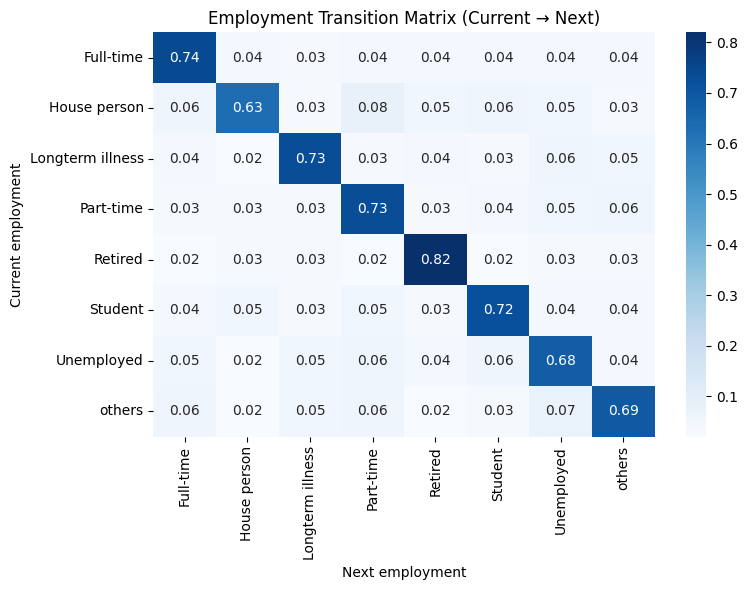

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# build probability matrix (row-normalized)
tm = pd.crosstab(
    panel["DEMO_EMPLS"],
    panel["NEXT_DEMO_EMPLS"],
    normalize="index"
).round(2)

plt.figure(figsize=(8,6))
sns.heatmap(tm, annot=True, cmap="Blues", fmt=".2f")
plt.title("Employment Transition Matrix (Current → Next)")
plt.xlabel("Next employment")
plt.ylabel("Current employment")
plt.tight_layout()
plt.show()

##  2 - Before vs. after composition (shares of each employment type)

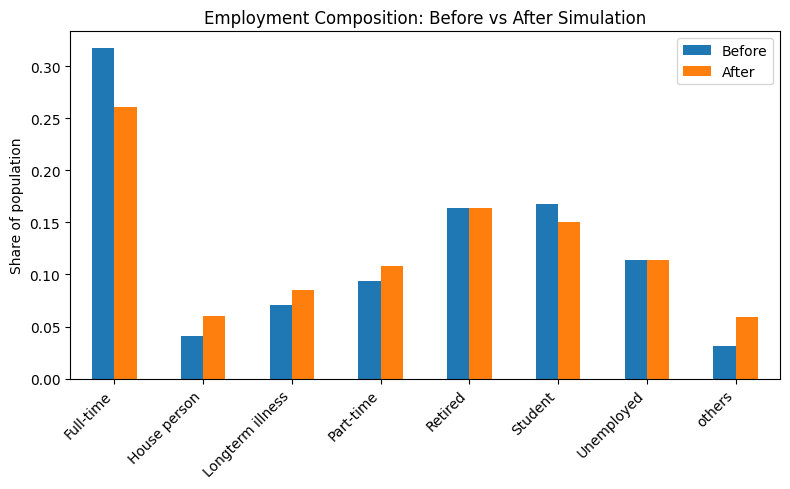

In [42]:
before = panel["DEMO_EMPLS"].value_counts(normalize=True).sort_index()
after  = panel["NEXT_DEMO_EMPLS"].value_counts(normalize=True).sort_index()

plot_df = pd.DataFrame({"Before": before, "After": after})

plot_df.plot(kind="bar", figsize=(8,5))
plt.title("Employment Composition: Before vs After Simulation")
plt.ylabel("Share of population")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 3 - Active rate by key group (equity/productivity pattern)

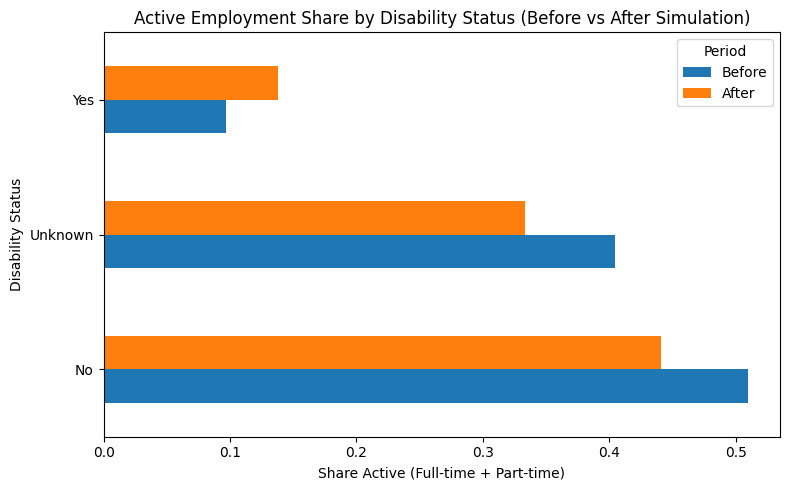

           Before  After
DEMO_DISA               
No          0.510  0.441
Unknown     0.405  0.333
Yes         0.097  0.138


In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# compute BEFORE (current) and AFTER (next) active shares by disability
before = (
    panel.groupby("DEMO_DISA")["DEMO_EMPLS_ACTIVE"]
          .apply(lambda x: (x=="Active").mean())
          .rename("Before")
)
after = (
    panel.groupby("DEMO_DISA")["NEXT_DEMO_EMPLS_ACTIVE"]
          .apply(lambda x: (x=="Active").mean())
          .rename("After")
)

# combine into one table
compare = pd.concat([before, after], axis=1).sort_index()

# plot side-by-side bars
compare.plot(kind="barh", figsize=(8,5))
plt.title("Active Employment Share by Disability Status (Before vs After Simulation)")
plt.xlabel("Share Active (Full-time + Part-time)")
plt.ylabel("Disability Status")
plt.legend(title="Period")
plt.tight_layout()
plt.show()

print(compare.round(3))

In [ ]:

# ============================================
# Step 5 — Save to Excel (optional)
# ============================================
panel.to_excel("microsim_results.xlsx", index=False)
print("\nResults saved to microsim_results.xlsx")